In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import datetime

In [2]:
# read in cleaned data

train_clean = pd.read_csv('../datasets/train_cleaned.csv')
test_clean = pd.read_csv('../datasets/test_cleaned.csv')

## Pre-Processing and Feature Engineering

In [3]:
# total sq_ft feature
train_clean['total_sqft'] = train_clean['Total Bsmt SF'] + train_clean['1st Flr SF'] + train_clean['2nd Flr SF']


# find year, regardless of when this notebook is run
today = datetime.datetime.now()

# age = current year - year built
train_clean['house_age'] =  today.year - train_clean['Year Built']

train_clean.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,total_sqft,house_age
0,109,533352170,60,RL,73.385027,13517.0,Pave,IR1,Lvl,AllPub,...,0.0,0.0,0.0,0.0,3.0,2010.0,WD,130500.0,2204.0,47.0
1,544,531379050,60,RL,43.000000,11492.0,Pave,IR1,Lvl,AllPub,...,0.0,0.0,0.0,0.0,4.0,2009.0,WD,220000.0,3035.0,27.0
2,153,535304180,20,RL,68.000000,7922.0,Pave,Reg,Lvl,AllPub,...,0.0,0.0,0.0,0.0,1.0,2010.0,WD,109000.0,2114.0,70.0
3,318,916386060,60,RL,73.000000,9802.0,Pave,Reg,Lvl,AllPub,...,0.0,0.0,0.0,0.0,4.0,2010.0,WD,174000.0,1828.0,17.0
4,255,906425045,50,RL,82.000000,14235.0,Pave,IR1,Lvl,AllPub,...,0.0,0.0,0.0,0.0,3.0,2010.0,WD,138500.0,2121.0,123.0


In [4]:
# Select categorical columns
train_categorical = train_clean.select_dtypes(include='object').columns

In [5]:
# One-Hot Encoding Categorical Variables

train_dummy = pd.get_dummies(data = train_clean, columns = train_categorical, drop_first=True)
pd.set_option('display.max_columns', 500)
train_dummy.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,total_sqft,house_age,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_None,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_None,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_None,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_None,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_Co

---

## Modeling 

### Initial Linear Regression

**We will be using some of the high correlation features from our EDA as well as our engineered features.**

In [6]:
# split data set into features and target 
X = train_dummy[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'house_age', 'total_sqft']]
y = train_dummy['SalePrice']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [8]:
# Scale data appropriately
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [9]:
lr = LinearRegression()

In [45]:
# create a baseline and calculate baseline score
baseline_preds = np.full_like(y_test, y_train.mean())
print(f'Baseline R2 Score: {r2_score(y_test, baseline_preds)}')

Baseline R2 Score: -0.00043273813883448753


In [11]:
# fitting our model
lr.fit(X_train_sc, y_train)

LinearRegression()

In [12]:
# cross validation score
print(f'Cross Val Mean: {cross_val_score(lr, X_train, y_train).mean()}')

# Train Test R2 Scores
print(f'Train R2 Score: {lr.score(X_train_sc, y_train)}')
print(f'Test R2 Score: {lr.score(X_test_sc, y_test)}')

Cross Val Mean: 0.744697080290431
Train R2 Score: 0.7590262245021039
Test R2 Score: 0.8144143630496047


In [13]:
train_preds = lr.predict(X_train_sc)
test_preds= lr.predict(X_test_sc)

In [ ]:
# Calculating RMSE
print(f'Train RMSE: {mean_squared_error(y_train, train_preds, squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, test_preds, squared=False)}')
print(f'Baseline RMSE: {mean_squared_error(y_test, baseline_preds, squared=False)}')

Train RMSE: 39038.99995198321
Test RMSE: 33756.48679092555
Baseline RMSE: 78375.26238032707



* Overall, this model seems to be doing predicting pretty well, with the decent cross validation score.  

* Our test R2 score highlights that our data is 81.44% successful in its predictions

* The fact that the Test Coefficient (R2 score) is higher than the Train suggests that the the model is slightly overfit, and does not generalize as well to new data.

* Our Test RMSE of 33,756 suggests that our model is predicting housing sale prices of \\$33,756.48 off the true value. This is considerably better than the baseline of \\$78375.25.


### Ridge Regression

In [15]:
ridge = RidgeCV(alphas = np.logspace(0, 5, 100), cv=5)
ridge.fit(X_train_sc, y_train)
ridge_train_pred = ridge.predict(X_train_sc)
ridge_test_pred = ridge.predict(X_test_sc)

print(f'Train Ridge R2 score:{ridge.score(X_train_sc, y_train)}')
print(f'Test Ridge R2 score:{ridge.score(X_test_sc, y_test)}')

print(f'Training Data Ridge RMSE: {mean_squared_error(y_train, ridge_train_pred, squared=False)}')
print(f'Testing Data Ridge RMSE: {mean_squared_error(y_test, ridge_test_pred, squared=False)}')

Train Ridge R2 score:0.7583615313449636
Test Ridge R2 score:0.8122838535064756
Training Data Ridge RMSE: 39092.80474163828
Testing Data Ridge RMSE: 33949.69486974672


* The R2 scores of our ridge model is not as high as those of our initial model

* The RSME is not as low as our initial model

* We will not be using this model

### Lasso Regression

In [16]:
lasso = LassoCV(alphas = np.logspace(0, 2, 30), cv=5)
lasso.fit(X_train_sc, y_train)
lasso_train_pred = lasso.predict(X_train_sc)
lasso_test_pred = lasso.predict(X_test_sc)


print(f'Train Lasso R2 score:{lasso.score(X_train_sc, y_train)}')
print(f'Test Lasso R2 score:{lasso.score(X_test_sc, y_test)}')

print(f'Training Data Lasso RMSE: {mean_squared_error(y_train, lasso_train_pred, squared=False)}')
print(f'Testing Data Lasso RMSE: {mean_squared_error(y_test, lasso_test_pred, squared=False)}')


Train Lasso R2 score:0.7590237301033471
Test Lasso R2 score:0.8143261792887333
Training Data Lasso RMSE: 39039.202004220526
Testing Data Lasso RMSE: 33764.50578549156


* The R2 scores of our ridge model is slightly higher than our initial model

* The RSME is slightly lower than our initial model

* This will be our preferred model

### Checking Linearity

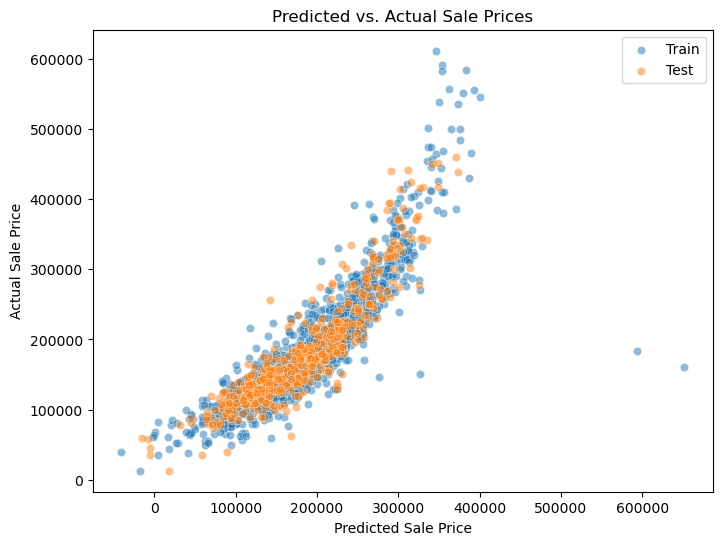

In [50]:
# scatterplot for Actual Vs. Predicted SalePrice

plt.figure(figsize=(8,6))
sns.scatterplot(x='Predicted', y='Actual', data=pd.DataFrame({'Predicted': train_preds, 'Actual': y_train}), alpha=0.5, label='Train')
sns.scatterplot(x='Predicted', y='Actual', data=pd.DataFrame({'Predicted': test_preds, 'Actual': y_test}), alpha=0.5, label='Test')

plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')

plt.title('Predicted vs. Actual Sale Prices')
plt.legend()
plt.savefig('../imgs/predicted_v_actual_scatter.png')
plt.show();

**There seems to be a linear relationship between Predicted Sale Price and Actual Sale Price, suggesting that there is Linearity.**

### Checking Independence

In [35]:
# calculate residuals
train_resids = y_train - train_preds
test_resids = y_test - test_preds

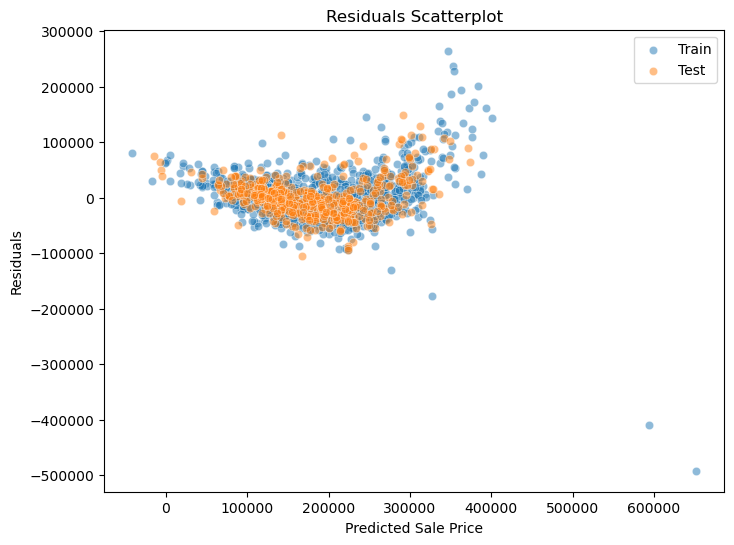

In [51]:
# plot residuals against predicted values

plt.figure(figsize=(8,6))
sns.scatterplot(x=train_preds, y=train_resids, alpha=0.5, label='Train')
sns.scatterplot(x=test_preds, y=test_resids, alpha=0.5, label='Test')

plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')

plt.title('Residuals Scatterplot')
plt.legend()
plt.show();

**Residuals (difference between actual and predicted values) does not have a noticeable relationship, therefore there is Normality.**

### Checking Normality

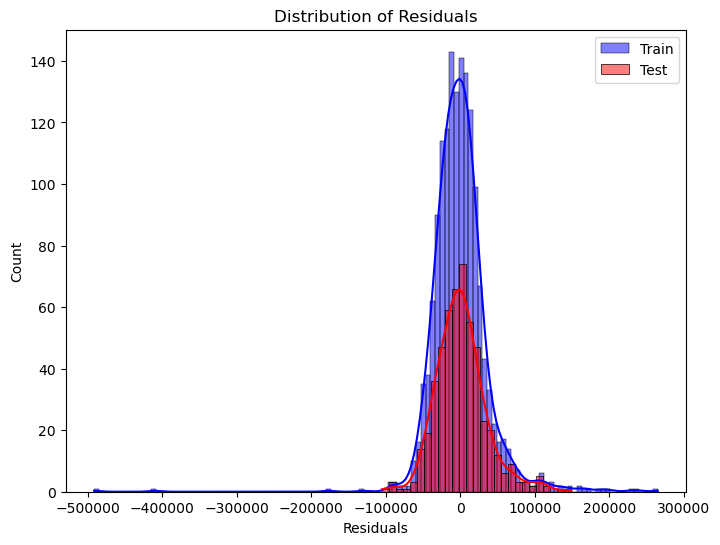

In [52]:
# create histograms of residuals
# derived from https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html

plt.figure(figsize=(8,6))
sns.histplot(train_resids, kde=True, color='blue', alpha=0.5, label='Train')
sns.histplot(test_resids, kde=True, color='red', alpha=0.5, label='Test')

plt.xlabel('Residuals')
plt.ylabel('Count')

plt.title('Distribution of Residuals')
plt.legend()
plt.savefig('../imgs/residuals_hist.png')
plt.show();

### Checking Equal Variances (Homoscadasticity)

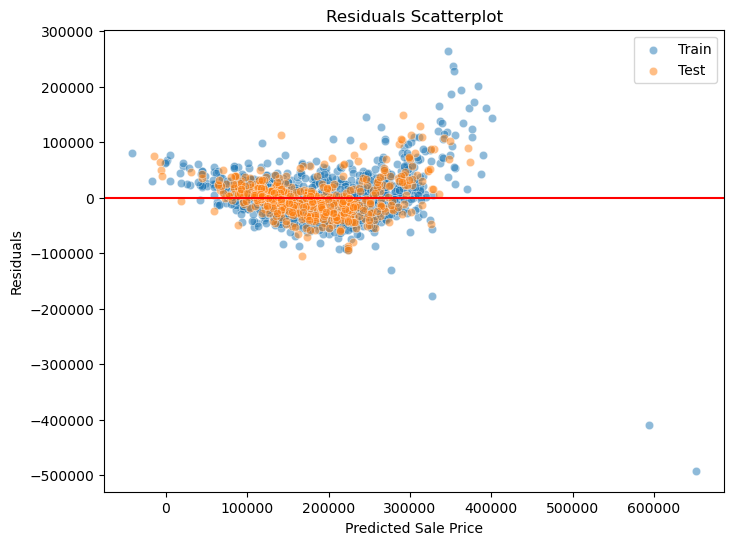

In [53]:
# plot residuals against predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=train_preds, y=train_resids, alpha=0.5, label='Train')
sns.scatterplot(x=test_preds, y=test_resids, alpha=0.5, label='Test')

# zero line for checking variance
plt.axhline(y=0, color='r', linestyle='-')

plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')

plt.title('Residuals Scatterplot')
plt.legend()
plt.savefig('../imgs/residuals_scatter.png')
plt.show();

**With the horizontal line at 0, with residuals relatively evenly spread around it, suggesting that there is Homoscadasticity.**

## Conclusion and Recommendations
In this project, we used EDA to find the key features that are highly correlated with our target value, the price of homes. 

By building linear regression models based on those key features as well as engineered features, we were able to train a model that best predicted our target data.

Out of the 3 candidate models: regular, ridge, and lasso, the Lasso model seemed to perform the best. It improves slightly over our initial model, and correctly predicted 81.44% of housing sale prices with an error of \\$33746, which is considerably better than our baseline error of \\$78,375.

From our model, we found that Overall Quality, Total Square Footage, and Housing Age are some key factors that determine the value of a house.

Our model performed better than the baseline model, but is not anywhere near the perfect model that we are striving for. 

Our Test R2 is higher than the Train R2, suggesting that the the model is slightly overfit, and does not generalize as well to new data.

**Recommendations for Future Exploration**

We can use variance inflation factor to help feature select some of the dummified columns to include into our data. This will make selecting categorically encoded features less of a guess and check.

To help better analyze our data, we should include more data points that are more normalized to the dataset, because of our bias due to the outliers of many higher priced homes.